import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#loading the dataset to the pandas dataframe
cereal=pd.read_csv('/content/drive/MyDrive/cereal.csv')

In [9]:
cereal.shape

(77, 16)

In [10]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [11]:
cereal.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

Data analysis and Visualisation

In [12]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


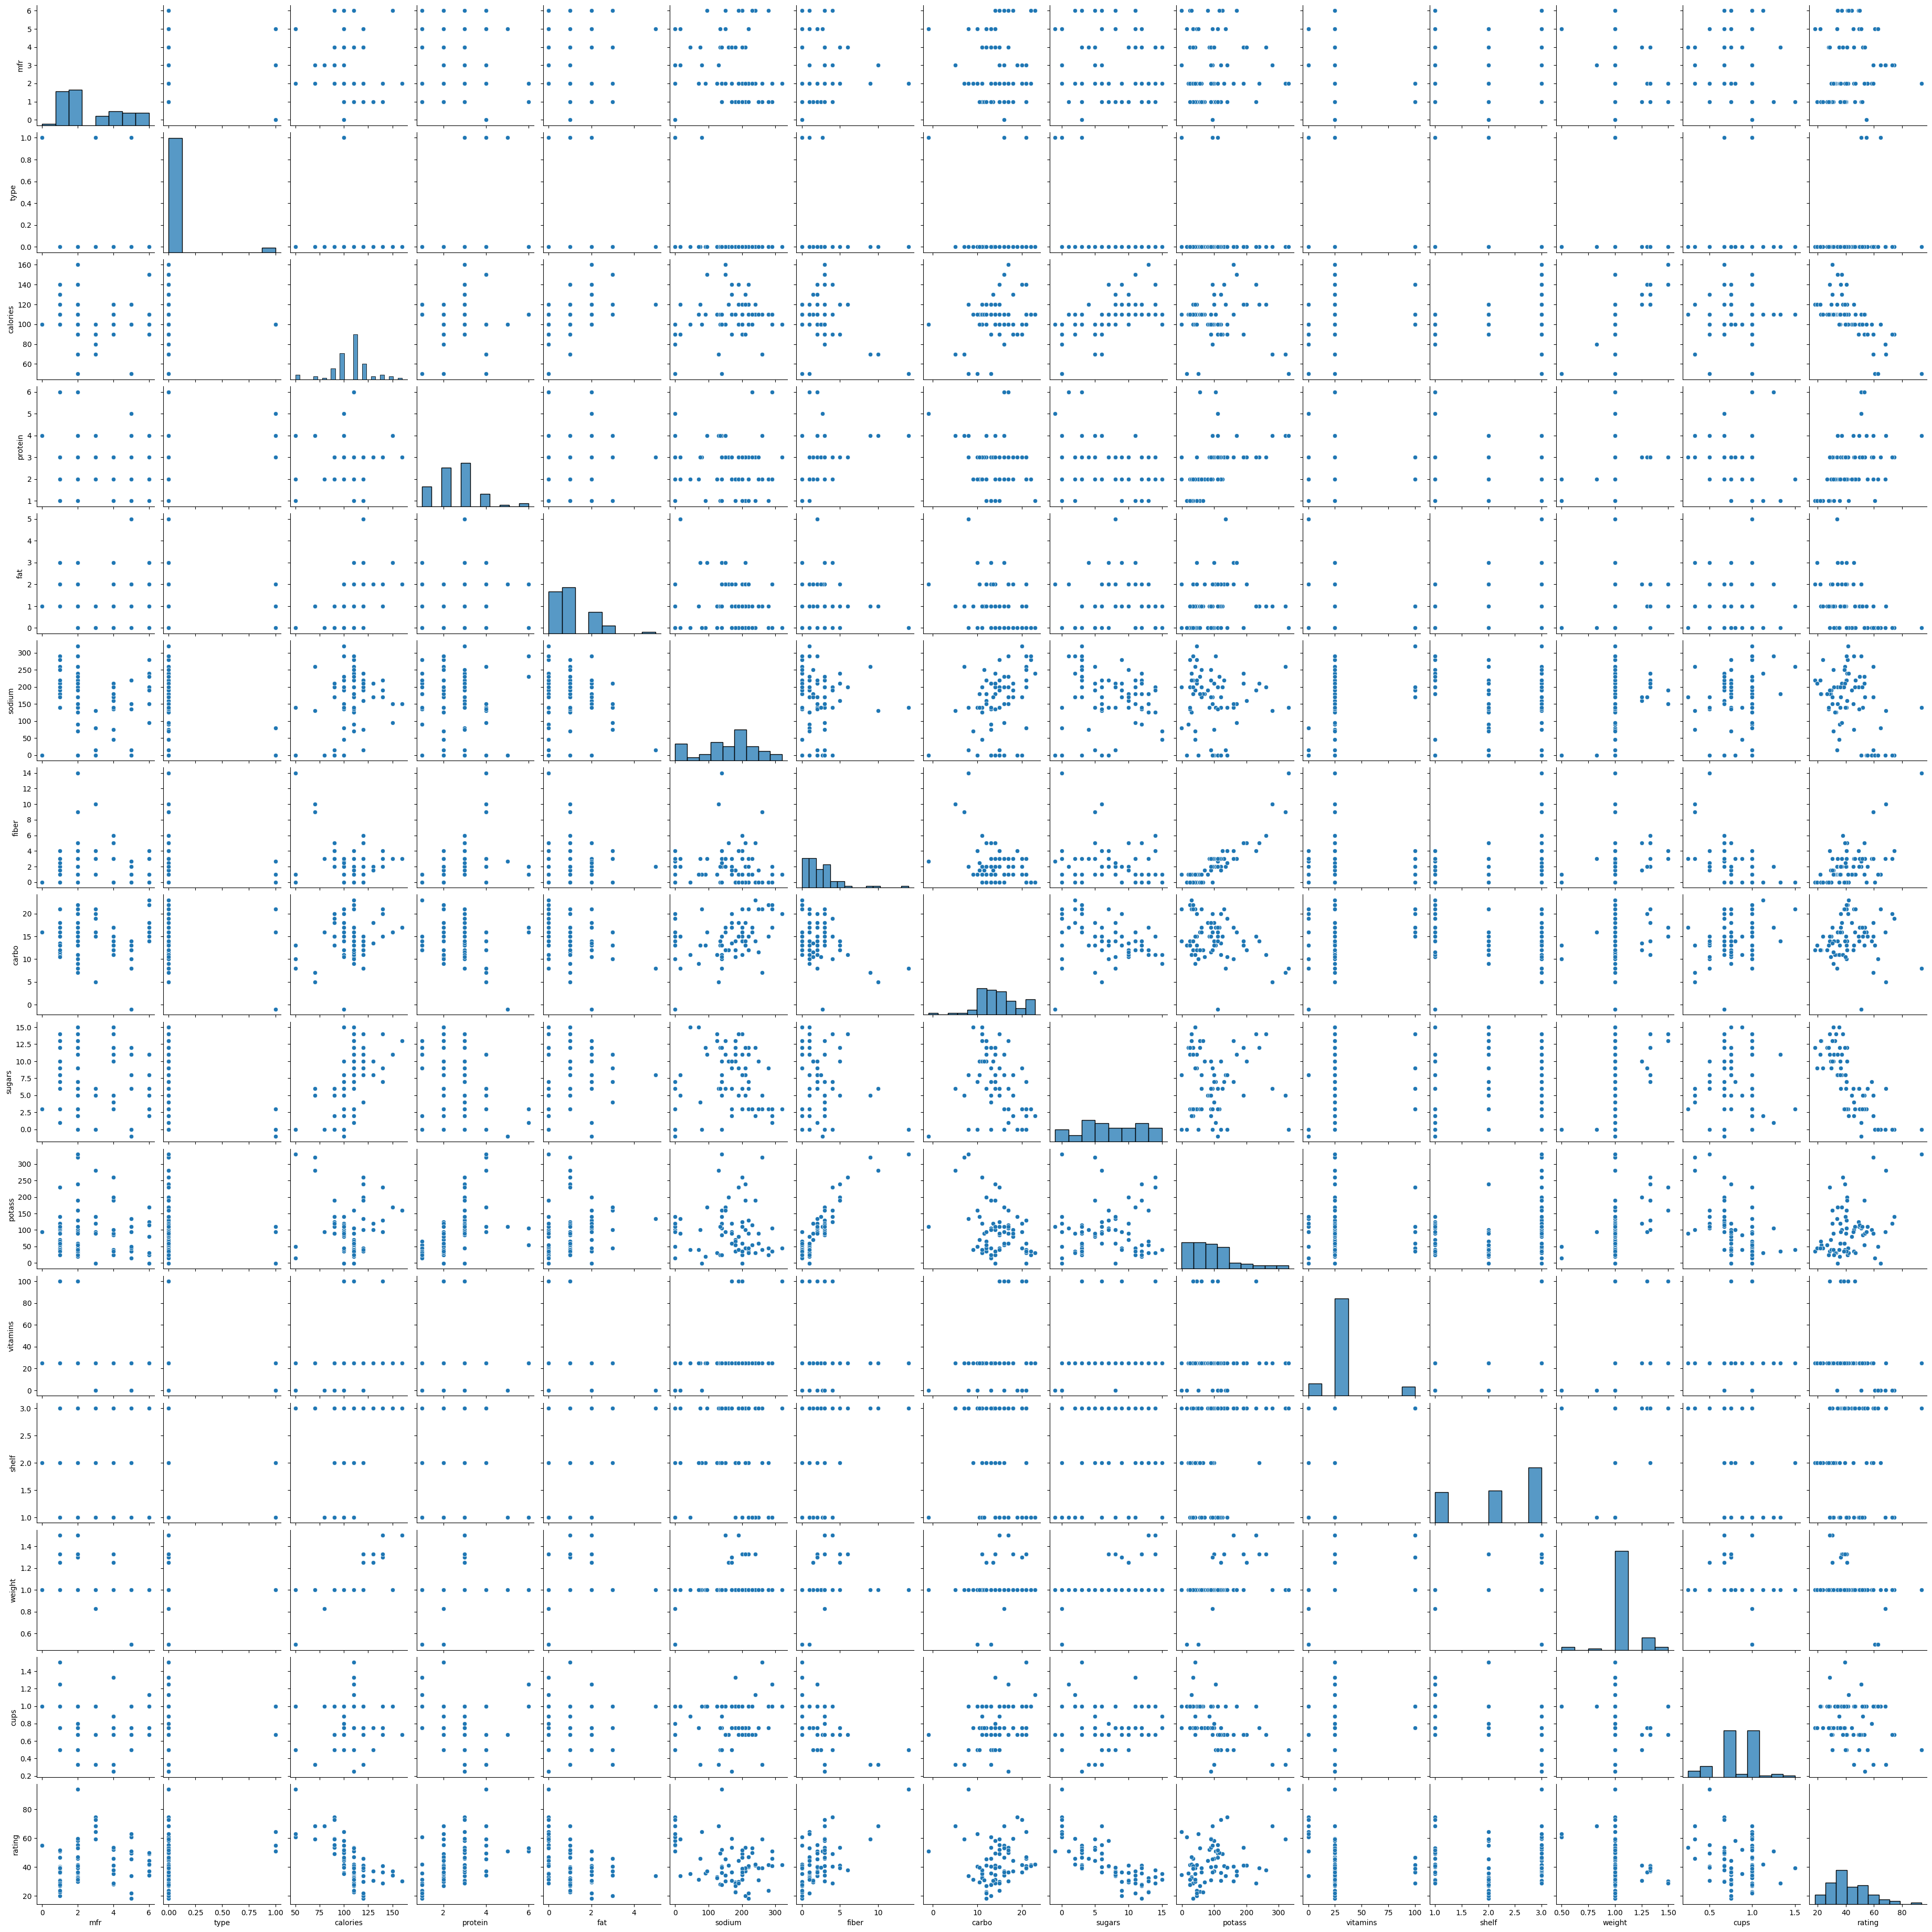

In [63]:
#no.of values for each rating
sns.pairplot(data=cereal)

<Axes: xlabel='rating', ylabel='calories'>

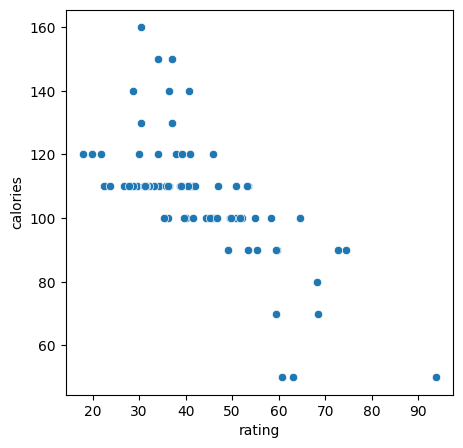

In [19]:
#calories vs rating
plot=plt.figure(figsize=(5,5))
sns.scatterplot(x="rating",y="calories", data=cereal)

<Axes: xlabel='rating', ylabel='protein'>

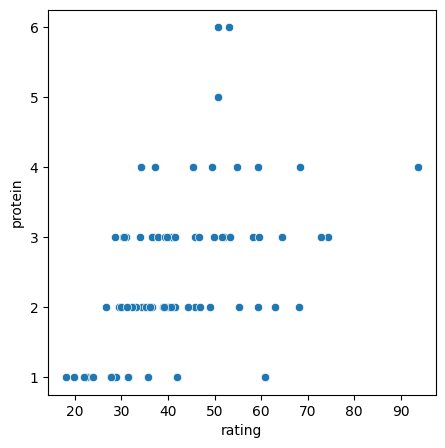

In [20]:
#protein vs rating
plot=plt.figure(figsize=(5,5))
sns.scatterplot(x="rating",y="protein", data=cereal)

<Axes: xlabel='rating', ylabel='fat'>

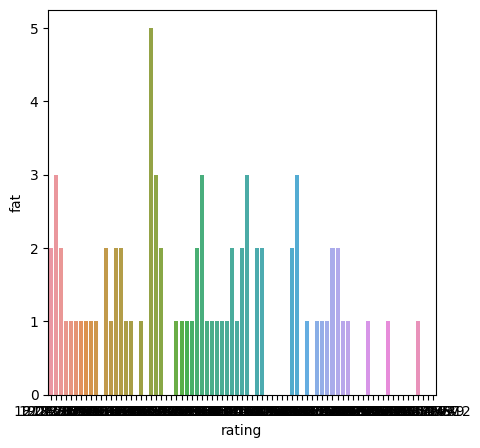

In [21]:
#fat vs rating
plot=plt.figure(figsize=(5,5))
sns.barplot(x="rating",y="fat", data=cereal)

<Axes: xlabel='rating', ylabel='sodium'>

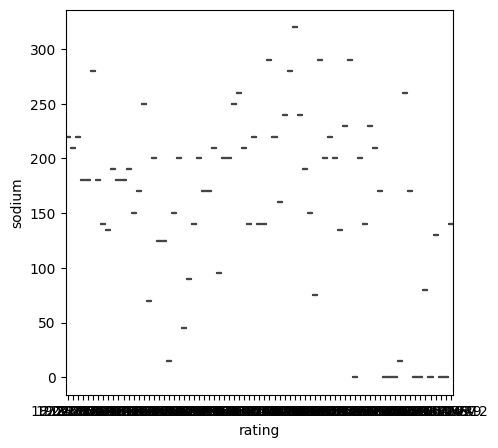

In [22]:
#sodium vs rating
plot=plt.figure(figsize=(5,5))
sns.boxplot(x="rating",y="sodium", data=cereal)

In [23]:
correl=cereal.corr()

<ipython-input-23-261981089ffb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=cereal.corr()


1.positive correlation

2.negative correlation

<Axes: >

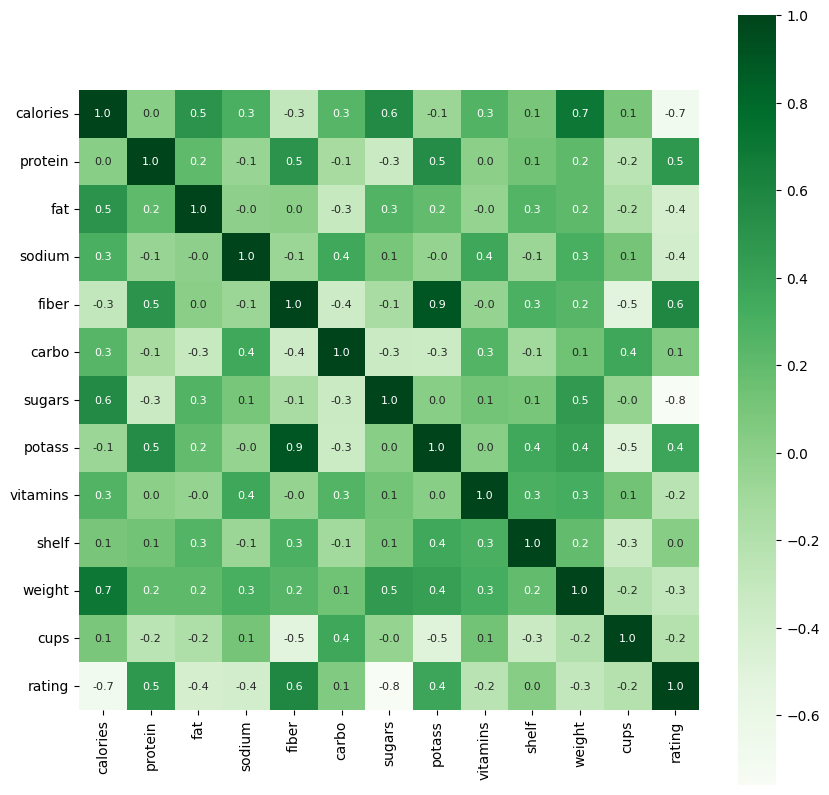

In [24]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correl,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Greens")

Data preprocessing

In [49]:
for column in['carbo','sugars','potass']:
    cereal[column] = cereal[column].fillna(cereal[column].mean())

In [ ]:
cereal.drop("name",axis=1,inplace=True)

In [51]:
# converting characters to numerical values by using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cereal["mfr"]=le.fit_transform(cereal["mfr"])
cereal["type"]=le.fit_transform(cereal["type"])

In [52]:
X=cereal.iloc[:,0:14].values  #independent variable
Y=cereal.iloc[:,14:15].values

In [53]:
print(X)

[[  3.     0.    70.   ...   3.     1.     0.33]
 [  5.     0.   120.   ...   3.     1.     1.  ]
 [  2.     0.    70.   ...   3.     1.     0.33]
 ...
 [  6.     0.   100.   ...   1.     1.     0.67]
 [  1.     0.   100.   ...   1.     1.     1.  ]
 [  1.     0.   110.   ...   1.     1.     0.75]]


In [54]:
print(Y)

[[68.402973]
 [33.983679]
 [59.425505]
 [93.704912]
 [34.384843]
 [29.509541]
 [33.174094]
 [37.038562]
 [49.120253]
 [53.313813]
 [18.042851]
 [50.764999]
 [19.823573]
 [40.400208]
 [22.736446]
 [41.445019]
 [45.863324]
 [35.782791]
 [22.396513]
 [40.448772]
 [64.533816]
 [46.895644]
 [36.176196]
 [44.330856]
 [32.207582]
 [31.435973]
 [58.345141]
 [40.917047]
 [41.015492]
 [28.025765]
 [35.252444]
 [23.804043]
 [52.076897]
 [53.371007]
 [45.811716]
 [21.871292]
 [31.072217]
 [28.742414]
 [36.523683]
 [36.471512]
 [39.241114]
 [45.328074]
 [26.734515]
 [54.850917]
 [37.136863]
 [34.139765]
 [30.313351]
 [40.105965]
 [29.924285]
 [40.69232 ]
 [59.642837]
 [30.450843]
 [37.840594]
 [41.50354 ]
 [60.756112]
 [63.005645]
 [49.511874]
 [50.828392]
 [39.259197]
 [39.7034  ]
 [55.333142]
 [41.998933]
 [40.560159]
 [68.235885]
 [74.472949]
 [72.801787]
 [31.230054]
 [53.131324]
 [59.363993]
 [38.839746]
 [28.592785]
 [46.658844]
 [39.106174]
 [27.753301]
 [49.787445]
 [51.592193]
 [36.187559]

Train & Test Split

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=23)

In [56]:
print(Y.shape,Y_train.shape,Y_test.shape)

(77, 1) (61, 1) (16, 1)


In [57]:
print(X.shape,X_train.shape,X_test.shape)

(77, 14) (61, 14) (16, 14)


Model Training

Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

Accuracy Score

In [60]:
model_pred=model.predict(X_test)
model_pred

array([[35.78279079],
       [40.10596491],
       [28.59278469],
       [31.23005438],
       [53.31381291],
       [59.36399354],
       [28.0257645 ],
       [32.20758152],
       [36.18755863],
       [49.12025291],
       [72.80178695],
       [34.38484326],
       [44.33085556],
       [39.70339957],
       [29.50954061],
       [93.70491277]])

In [61]:
Y_p=model.predict([[0,0,70,4,1,130,10,5,6,280,25,3,1,0.33]])
Y_p

array([[68.40297297]])

In [62]:
from sklearn.metrics import r2_score
r2_score(Y_test,model_pred)

0.9999999999999996